<a href="https://colab.research.google.com/github/satyampundi/satyampundi/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from matplotlib import rcParams

rcParams["figure.figsize"]=10,5
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/filesint246/Iris.csv'
df = pd.read_csv(path)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()
iris = load_iris()

In [ ]:
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = dataset.data
y = dataset.target

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

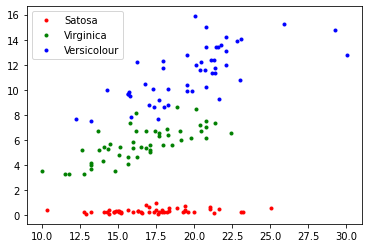

In [ ]:
plt.plot(X[:, 0][y == 0] * X[:, 1][y == 0], X[:, 2][y == 0] * X[:, 3][y == 0], 'r.', label="Satosa")
plt.plot(X[:, 0][y == 1] * X[:, 1][y == 1], X[:, 2][y == 1] * X[:, 3][y == 1], 'g.', label="Virginica")
plt.plot(X[:, 0][y == 2] * X[:, 1][y == 2], X[:, 2][y == 2] * X[:, 3][y == 2], 'b.', label="Versicolour")
plt.legend()
plt.show()

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:

from sklearn.preprocessing import StandardScaler


sc=StandardScaler()

sc.fit(X_train)

X_train_std =sc.transform(X_train)
X_test_std =sc.transform(X_test)

print("unique: {0}".format(np.unique(y)))

unique: [0 1 2]


In [ ]:
X_train_std = X_train_std[:,[2,3]]
X_test_std = X_test_std[:,[2,3]]

Dividing traing data and testing data

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.3
random_state=0

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,random_state=random_state)

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

n_iter=40
eta0=0.1

ppn = Perceptron(n_iter_no_change=n_iter,
                 eta0=eta0,
                 random_state=random_state)

ppn.fit(X_train_std,y_train)


y_pred = ppn.predict(X_test_std)

In [ ]:
print("accuracy : {0:.2f}%".format(accuracy_score(y_test,y_pred)*100))

accuracy : 91.11%


LabelEncoder for fiting data

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

df['Species'] = lb.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


we have to store Species as target for data 

In [ ]:
a=df.drop(columns=['Species'])
b=df['Species']
a[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(a, b,test_size=0.3,random_state=1)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


all the models used for prediction 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
knn= KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
models = [lr,knn,svm,nb,dt,rf]
scores = []

for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))
  print("Accuracy of " + type(model).__name__ + "is",accuracy_score(y_test,y_pred))

Accuracy of LogisticRegressionis 0.9777777777777777
Accuracy of KNeighborsClassifieris 0.9777777777777777
Accuracy of SVCis 0.9777777777777777
Accuracy of GaussianNBis 0.9333333333333333
Accuracy of DecisionTreeClassifieris 0.9555555555555556
Accuracy of RandomForestClassifieris 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
results = pd.DataFrame({
    'Models':['Logistic Regression','K-Nearest Neighbours','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest'
    ],'Accuracy':scores
})
results = results.sort_values(by='Accuracy',ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.977778
1    K-Nearest Neighbours  0.977778
2  Support Vector Machine  0.977778
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333


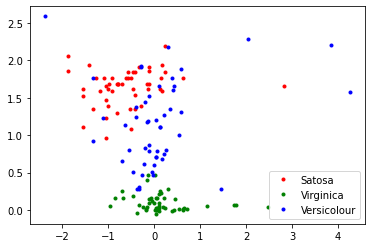

In [ ]:
plt.plot(X[:, 0][y == 0] * X[:, 1][y == 0], X[:, 2][y == 0] * X[:, 3][y == 0], 'r.', label="Satosa")
plt.plot(X[:, 0][y == 1] * X[:, 1][y == 1], X[:, 2][y == 1] * X[:, 3][y == 1], 'g.', label="Virginica")
plt.plot(X[:, 0][y == 2] * X[:, 1][y == 2], X[:, 2][y == 2] * X[:, 3][y == 2], 'b.', label="Versicolour")
plt.legend()
plt.show()